In [1]:
import sys
import os
sys.path.append('../src')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 导入新模块
from time_series_analyzer import time_series_analyzer
from predictive_model import predictive_model
from config import PROCESSED_DATA_PATH

print("===  时间序列分析与预测模型 ===")
print("开始时间序列分析和机器学习预测...")

=== DAY 5: 时间序列分析与预测模型 ===
开始时间序列分析和机器学习预测...


In [2]:
print("步骤1: 加载数据")
df = pd.read_csv(PROCESSED_DATA_PATH, parse_dates=['datetime'])
df['date'] = pd.to_datetime(df['date'])

print(f"数据加载完成: {len(df):,} 条记录")
print(f"时间范围: {df['date'].min()} 到 {df['date'].max()}")

步骤1: 加载数据
数据加载完成: 499,997 条记录
时间范围: 2014-01-02 00:00:00 到 2025-11-02 00:00:00


In [3]:
print("步骤2: 时间序列数据准备")

# 准备时间序列数据
time_series_data = time_series_analyzer.prepare_time_series_data(df)

# 分析趋势
trend_analysis, ts_with_trends = time_series_analyzer.analyze_trends(time_series_data)

print("✅ 时间序列数据准备完成")

步骤2: 时间序列数据准备
===时间序列数据准备===
时间序列长度36天
时间范围2014-01-02 00:00:00到2025-11-02 00:00:00

时间序列趋势
指标 dau 增长率：0.00%
指标 daily_actions 增长率：0.00%
指标 daily_purchases 增长率：0%（首末值均为0，无增长）
✅ 时间序列数据准备完成


步骤3: 时间序列深度分析

=== daily_actions 季节性分析 ===
季节性强度: 0.263

daily_purchases平稳性检验
ADF统计量-0.5275
p值0.8865
临界值：
1%:-3.7112
5%:-2.9812
10%:-2.6301
序列是否平稳否
周内模式分析
周内模式（平均值）:
         dau  daily_actions  daily_purchases  purchase_conversion
周一   5727.88        6206.88           140.75                 0.31
周二  22744.50       24669.00           509.50                 1.11
周三  11741.50       12790.50           276.00                 0.59
周四   8083.00        8793.67           193.17                 0.40
周五   9547.00       10381.00           194.83                 0.61
周六  22302.40       24368.40           459.80                 0.83
周日  20773.80       22590.40           448.60                 0.86
生成时间序列分析图表
✅ 时间序列图表已保存至: D:\新建文件夹\电商用户行为分析\reports\figures\time_series_analysis.png


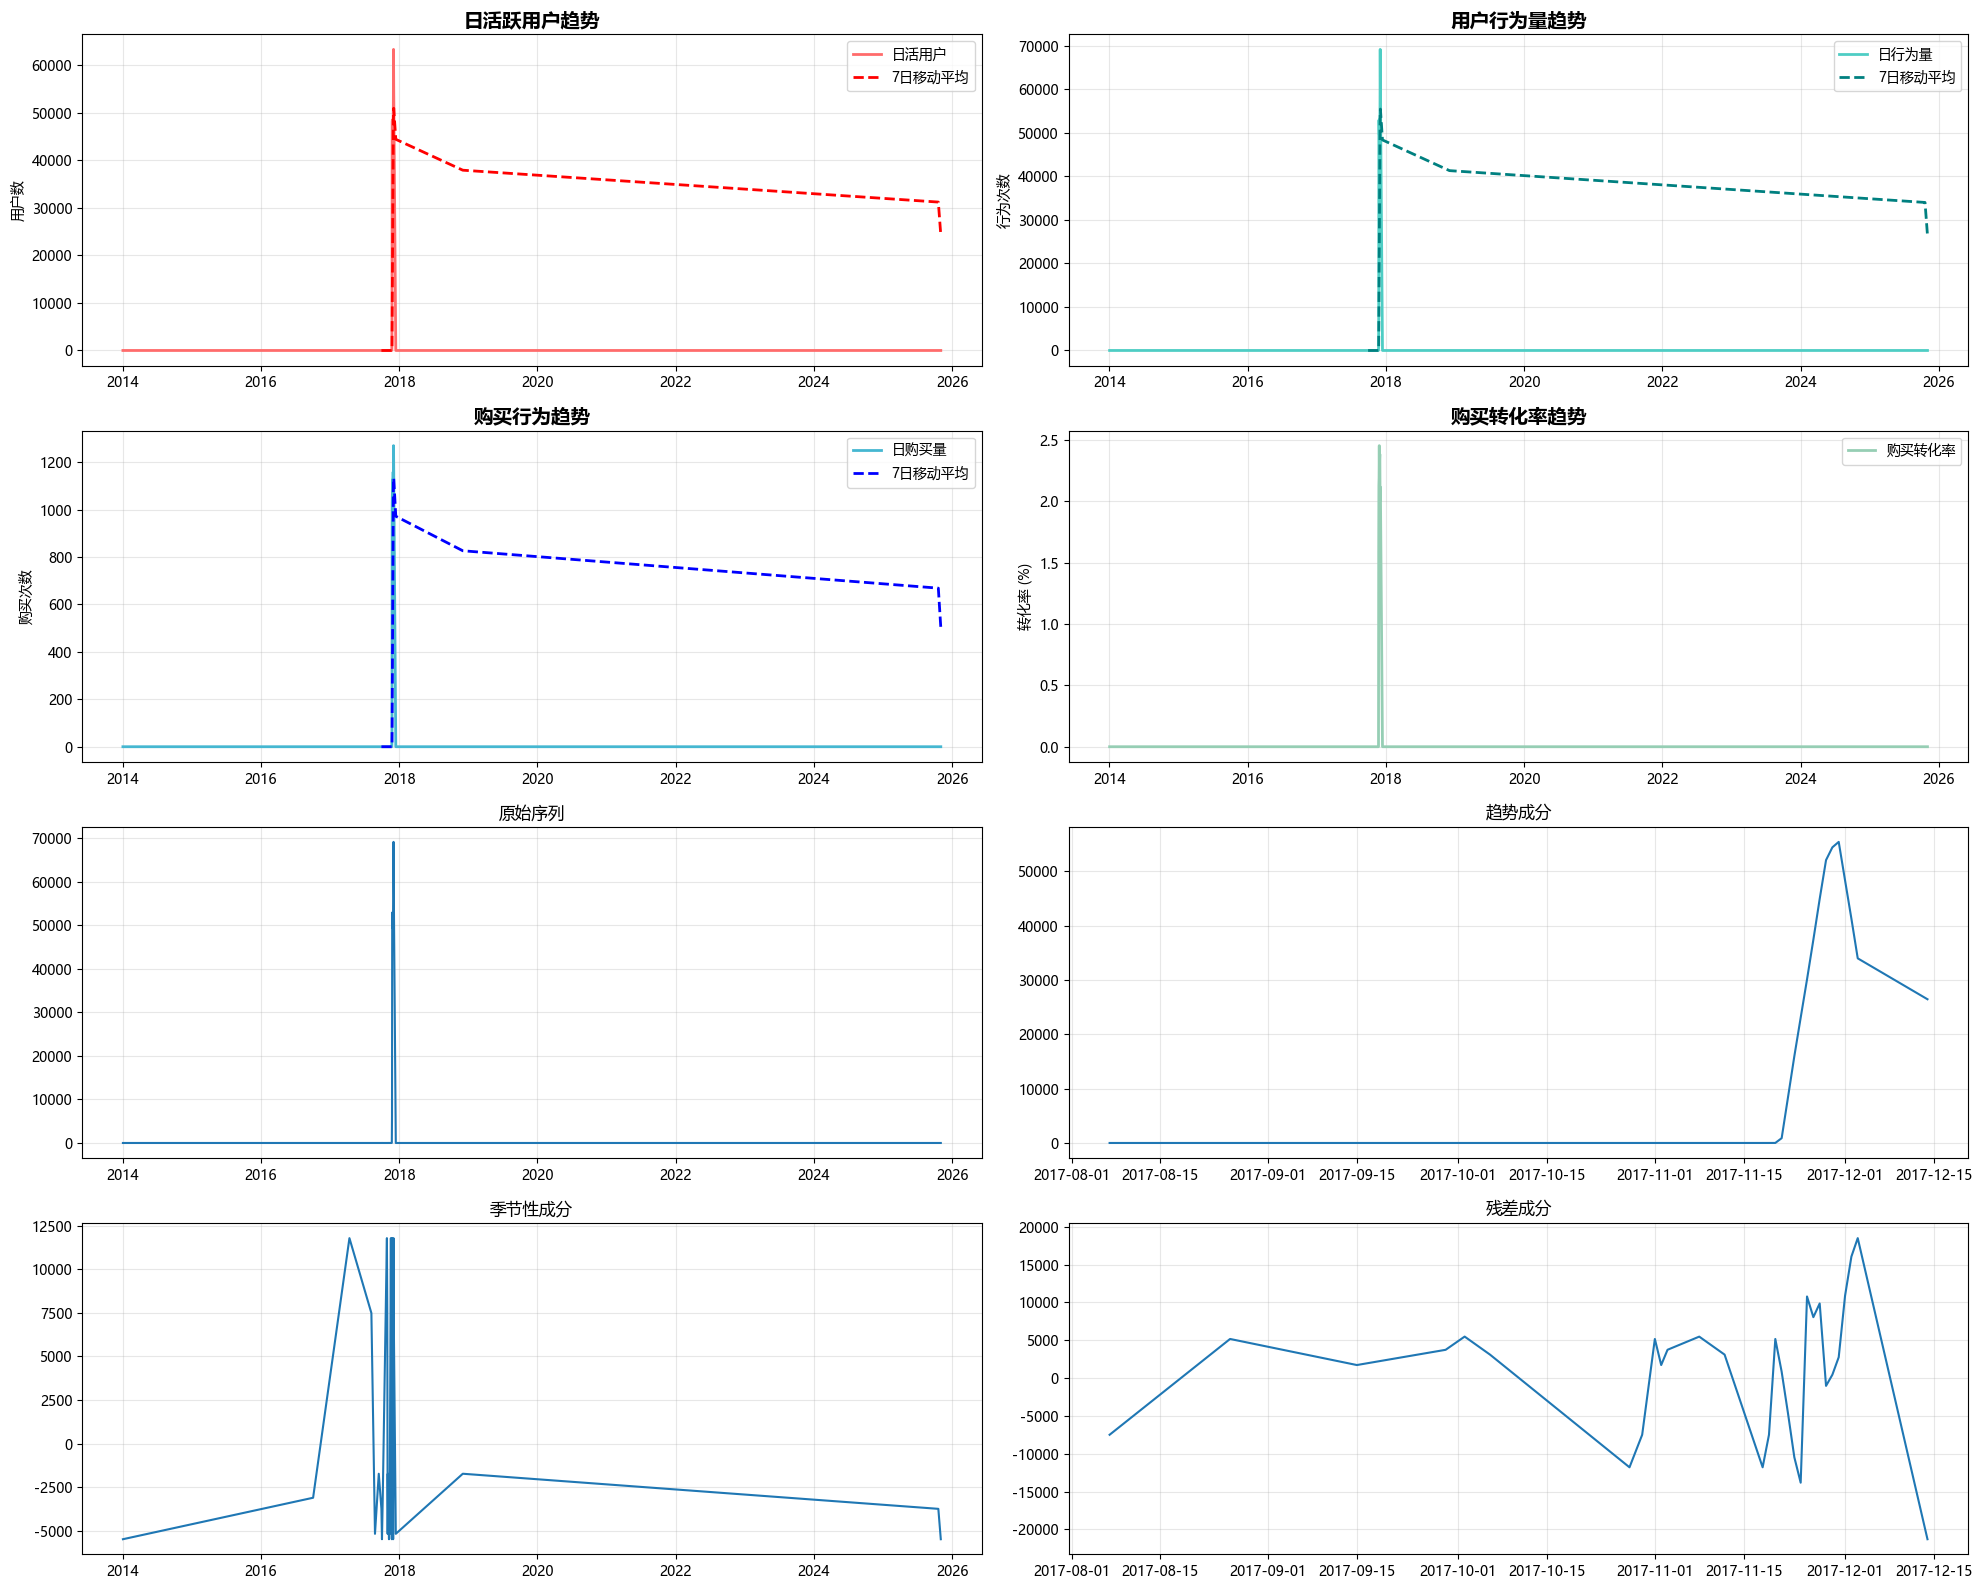

✅ 时间序列深度分析完成


In [4]:
print("步骤3: 时间序列深度分析")

# 季节性分析
decomposition = time_series_analyzer.analyze_seasonality(ts_with_trends, 'daily_actions')

# 平稳性检验
stationarity = time_series_analyzer.stationarity_test(ts_with_trends, 'daily_purchases')

# 周内模式分析
weekday_patterns = time_series_analyzer.analyze_weekly_patterns(ts_with_trends)

# 可视化时间序列分析
ts_viz = time_series_analyzer.create_time_series_visualization(ts_with_trends, decomposition)

print("✅ 时间序列深度分析完成")

In [5]:
print("步骤4: 机器学习特征工程")

# 准备机器学习特征
features_df = predictive_model.prepare_features(ts_with_trends, 'daily_purchases', lag_days=7)

print(f"特征数据集形状: {features_df.shape}")
print("✅ 特征工程完成")

步骤4: 机器学习特征工程
特征工程
特征数量38
有效样本数:7
特征数据集形状: (7, 39)
✅ 特征工程完成


In [6]:
print("步骤5: 模型训练与评估")

# 训练预测模型
model_results = predictive_model.train_models(features_df, 'daily_purchases', test_size=0.2)

# 分析特征重要性
feature_importance = predictive_model.analyze_feature_importance(features_df, 'daily_purchases')

print("✅ 模型训练与评估完成")

步骤5: 模型训练与评估

=== 模型训练 ===
训练 RandomForest...
  RandomForest - MAE: 723.74, R²: 0.0000
训练 LinearRegression...
  LinearRegression - MAE: 309.11, R²: 0.0000

特征重要性分析
top10的重要特征
dau:0.0000
daily_items:0.0000
daily_actions:0.0000
daily_buyers:0.0000
purchase_conversion:0.0000
avg_actions_per_user:0.0000
dau_ma7:0.0000
dau_ma30:0.0000
daily_actions_ma7:0.0000
daily_actions_ma30:0.0000
✅ 模型训练与评估完成


步骤6: 未来预测
预测未来7天
未来预测结果:
            predicted  confidence_lower  confidence_upper
date                                                     
2025-11-03    -377.35           -686.46            -68.25
2025-11-04    -377.33           -686.44            -68.22
2025-11-05    -377.33           -686.44            -68.22
2025-11-06    -377.33           -686.44            -68.22
2025-11-07    -377.33           -686.44            -68.22
2025-11-08    -377.33           -686.44            -68.22
2025-11-09    -377.33           -686.44            -68.22
生成预测分析图表...
✅ 预测分析图表已保存至: D:\新建文件夹\电商用户行为分析\reports\figures\predictive_analysis.png


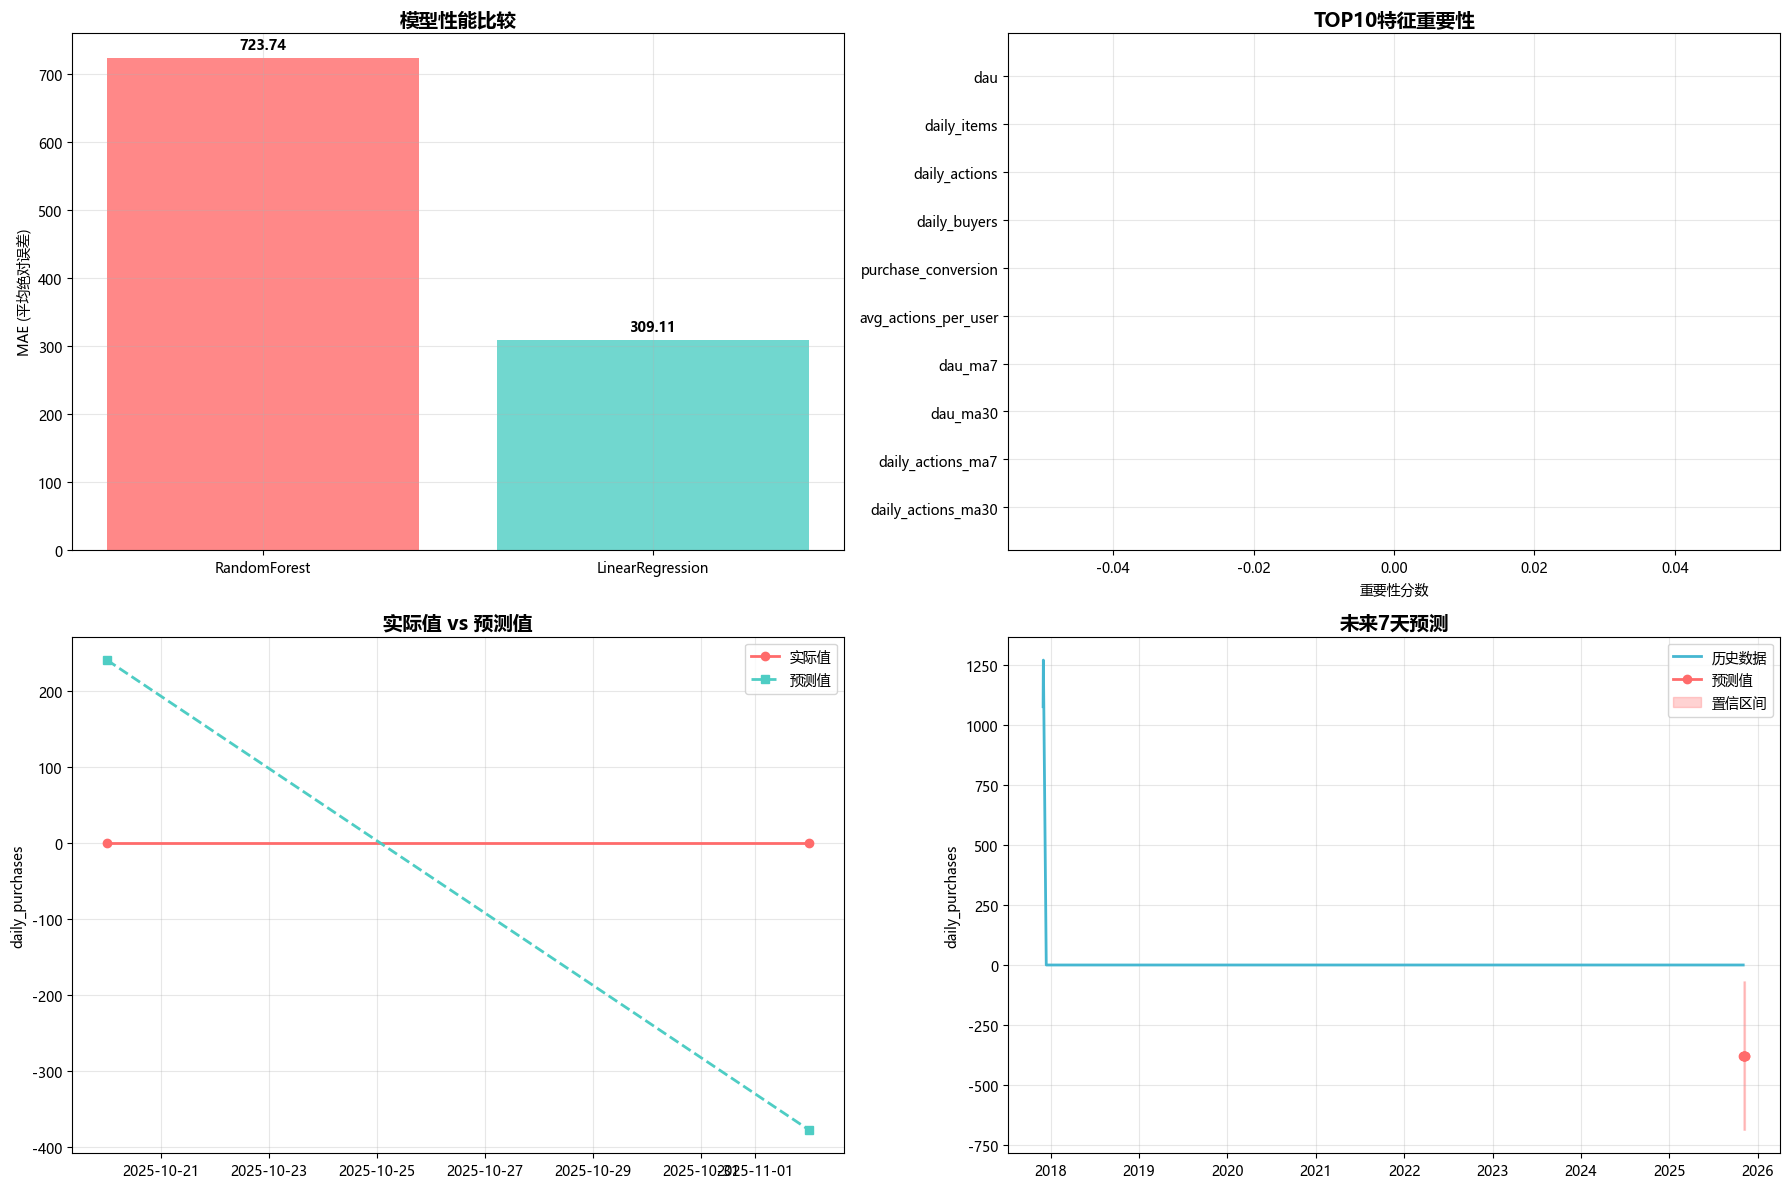

✅ 未来预测完成


In [7]:
print("步骤6: 未来预测")

# 预测未来7天
forecast_df = predictive_model.predict_future(features_df, 'daily_purchases', days=7)

# 创建预测可视化
prediction_viz = predictive_model.create_prediction_visualization(
    features_df, 'daily_purchases', forecast_df
)

print("✅ 未来预测完成")

In [8]:
print("步骤7: 生成时间序列分析报告")

# 获取最佳模型
best_model_name = min(model_results.keys(), key=lambda x: model_results[x]['mae'])
best_model_perf = model_results[best_model_name]

# 计算关键业务指标
total_growth = trend_analysis.get('daily_purchases_growth', 0)
avg_daily_purchases = ts_with_trends['daily_purchases'].mean()
best_weekday = weekday_patterns['daily_purchases'].idxmax()

report_content = f"""
# 时间序列分析与预测模型报告

## 时间序列洞察

### 1. 趋势分析
- 购买量总体增长率: {total_growth:.1f}%
- 平均日购买量: {avg_daily_purchases:.1f} 次
- 最佳销售日: {best_weekday} (平均{weekday_patterns.loc[best_weekday, 'daily_purchases']:.1f}次)

### 2. 季节性模式
- 序列平稳性: {'平稳' if stationarity['is_stationary'] else '非平稳'}
季节性强度: {
    decomposition.seasonal.std() / ts_with_trends['daily_purchases'].std()
    if (decomposition
        and hasattr(decomposition, 'seasonal')
        and decomposition.seasonal.any()
        and ts_with_trends['daily_purchases'].std() != 0)
    else np.nan
}

### 3. 预测模型表现
- 最佳模型: {best_model_name}
- 预测MAE: {best_model_perf['mae']:.2f}
- 预测R²: {best_model_perf['r2']:.4f}
- 交叉验证稳定性: {best_model_perf['cv_std_mae']:.2f}

## 业务预测与建议

### 未来7天预测
{' | '.join([f"{forecast_df.index[i].strftime('%m-%d')}: {forecast_df['predicted'].iloc[i]:.1f}次" for i in range(min(3, len(forecast_df)))])}

### 运营建议
1. **库存规划**: 根据预测调整未来一周的库存水平
2. **营销活动**: 在预测的高峰期前部署营销活动
3. **资源分配**: 基于周内模式优化客服和物流资源
4. **异常监控**: 建立预测值与实际值的监控告警机制

### 技术成果
- ✅ 完整的时间序列分析流程
- ✅ 季节性分解和平稳性检验
- ✅ 机器学习特征工程
- ✅ 多模型比较与选择
- ✅ 未来预测与置信区间

## 模型解释
**关键预测因子:**
{chr(10).join([f"- {row['feature']}: {row['importance']:.3f}" for i, row in feature_importance.head(5).iterrows()]) if feature_importance is not None else "- 特征重要性分析暂不可用"}
"""

report_path = PROCESSED_DATA_PATH.parent.parent / "reports" / "analysis_reports" / "时间序列分析与预测报告.md"
with open(report_path, 'w', encoding='utf-8') as f:
    f.write(report_content)

print(f"✅ 时间序列分析报告已生成: {report_path}")

步骤7: 生成时间序列分析报告
✅ 时间序列分析报告已生成: D:\新建文件夹\电商用户行为分析\reports\analysis_reports\时间序列分析与预测报告.md
